In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Load bed file regions into DataFrame

In [2]:
inFile = "capture_based/capture_merged10_split500.bed" # merge -d 10 capture bed
intervals_df = pd.read_csv(inFile, sep='\t', names=['chrom', 'start', 'end'])
print(len(intervals_df))

2685


In [4]:
chroms = intervals_df['chrom'].unique().tolist()
print(chroms)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', 'X']


In [5]:
intervals_df['length'] = intervals_df['end'] - intervals_df['start']

In [6]:
intervals_df.head()

,chrom,start,end,length
0,1,7917093,7917213,120
1,1,17345175,17345483,308
2,1,17348948,17349280,332
3,1,17350437,17350599,162
4,1,17354213,17354390,177


In [7]:
dist_list = []
for chrom in chroms:
    dist_list.append(0)
    chrom_ints = intervals_df[intervals_df['chrom'] == chrom]
    chrom_starts = chrom_ints['start'].to_list()[1:]
    chrom_ends = chrom_ints['end'].to_list()[:-1]
    for i in range(len(chrom_starts)):
        dist_list.append(chrom_starts[i] - chrom_ends[i])

print(len(dist_list))
print(len(intervals_df))

if len(dist_list) == len(intervals_df):
    intervals_df['dist_before'] = dist_list
    dist_after = dist_list[1:].copy()
    dist_after.append(0) # returns None, happens inplace
    intervals_df['dist_after'] = dist_after

2685
2685


In [8]:
intervals_df.iloc[:10]

,chrom,start,end,length,dist_before,dist_after
0,1,7917093,7917213,120,0,9427962
1,1,17345175,17345483,308,9427962,3465
2,1,17348948,17349280,332,3465,1157
3,1,17350437,17350599,162,1157,3614
4,1,17354213,17354390,177,3614,674
5,1,17355064,17355261,197,674,4263
6,1,17359524,17359670,146,4263,11555
7,1,17371225,17371413,188,11555,8938
8,1,17380351,17380714,363,8938,8489275
9,1,25869989,25870307,318,8489275,10075


## Define lengths, ditances

In [11]:
print(intervals_df['length'].min())
print(intervals_df['length'].mean())
print(intervals_df['length'].max())

2
255.33296089385476
500


In [9]:
print(intervals_df['dist_before'].min())
print(intervals_df['dist_before'].mean())
print(intervals_df['dist_before'].max())

0
833875.1832402234
75040058


In [10]:
print(intervals_df['dist_after'].min())
print(intervals_df['dist_after'].mean())
print(intervals_df['dist_after'].max())

0
833875.1832402234
75040058


In [27]:
intervals_df.groupby('length').count()[:20]

,chrom,start,end,dist_before,dist_after
length,,,,,
2,5,5,5,5,5
3,6,6,6,6,6
4,2,2,2,2,2
5,5,5,5,5,5
6,6,6,6,6,6
7,4,4,4,4,4
8,4,4,4,4,4
10,3,3,3,3,3
11,3,3,3,3,3


In [28]:
intervals_df.groupby('length').count()[-10:]

,chrom,start,end,dist_before,dist_after
length,,,,,
487,3,3,3,3,3
488,10,10,10,10,10
489,5,5,5,5,5
490,4,4,4,4,4
491,4,4,4,4,4
492,1,1,1,1,1
494,1,1,1,1,1
498,22,22,22,22,22
499,52,52,52,52,52


## Visualise intervals

/home/sophier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'size (b)')

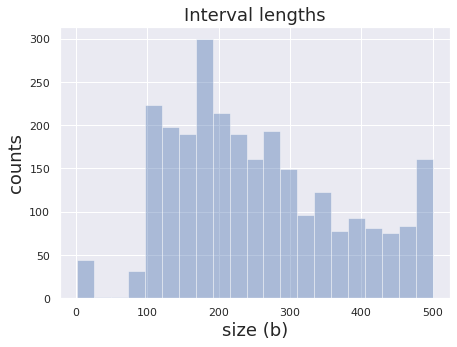

In [12]:
f, ax = plt.subplots(figsize=(7, 5))

sns.distplot(intervals_df['length'], ax=ax, kde=False)

ax.set_title('Interval lengths', fontsize = 18)
ax.set_ylabel('counts', fontsize=18)
ax.set_xlabel('size (b)', fontsize = 18)


/home/sophier/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'size (b)')

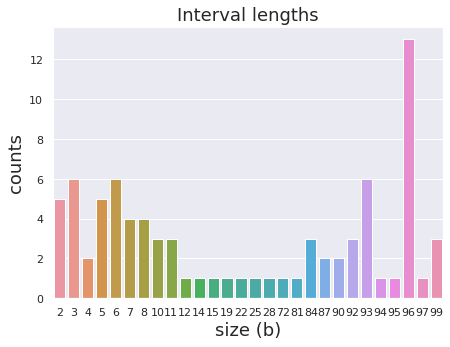

In [15]:
f, ax = plt.subplots(figsize=(7, 5))

sns.countplot(intervals_df.loc[intervals_df['length'] < 100, 'length'], ax=ax)

ax.set_title('Interval lengths', fontsize = 18)
ax.set_ylabel('counts', fontsize=18)
ax.set_xlabel('size (b)', fontsize = 18)


/home/sophier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


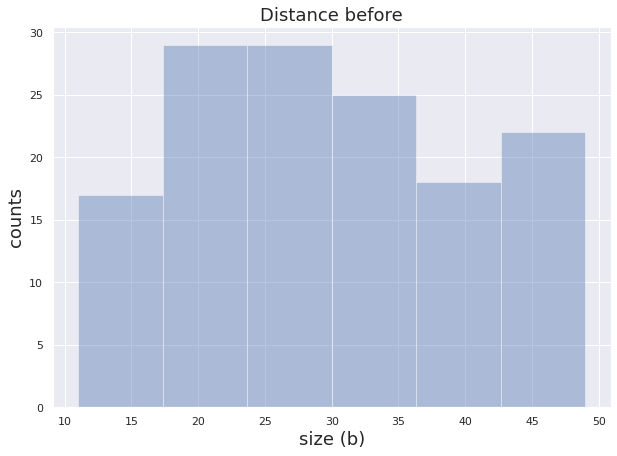

In [24]:
f, ax = plt.subplots(figsize=(10,7))

sns.distplot(intervals_df.loc[(intervals_df['dist_before'] != 0) & (intervals_df['dist_before'] < 50), 'dist_before'], ax=ax, kde=False)

ax.set_title('Distance before', fontsize = 18)
ax.set_ylabel('counts', fontsize=18)
ax.set_xlabel('size (b)', fontsize = 18)

plt.show()

/home/sophier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


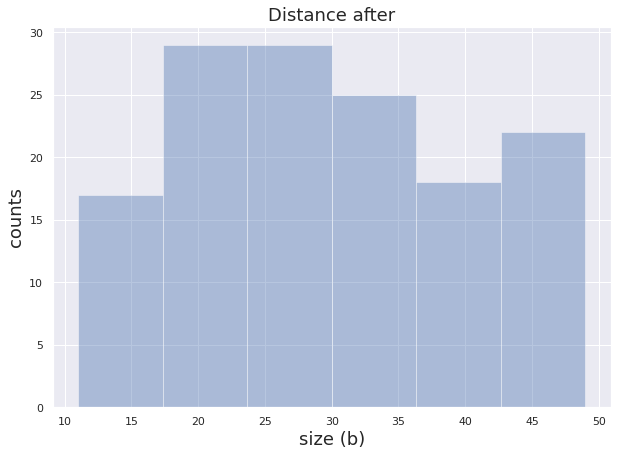

In [25]:
f, ax = plt.subplots(figsize=(10,7))

sns.distplot(intervals_df.loc[(intervals_df['dist_after'] != 0) & (intervals_df['dist_after'] < 50), 'dist_after'], ax=ax, kde=False)

ax.set_title('Distance after', fontsize = 18)
ax.set_ylabel('counts', fontsize=18)
ax.set_xlabel('size (b)', fontsize = 18)

plt.show()